In [1]:
from datasets.mnist import MNIST

from nn.model import Sequential

from nn.activations import relu, tanh, sigmoid
from nn.layers import Dense
from nn.loss import MeanSquaredError
from nn.optimizer import GradientDescent

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
nn = Sequential(input_shape=(1, 784),
                layers=[
                    Dense(128, activation=relu),
                    Dense(10, activation=tanh)],
                optimizer=GradientDescent(0.1),
                loss=MeanSquaredError())

nn.info()

model: Sequential
------------------------------
Dense | (128,784) <(128, 1)> | relu
Dense | (10,128) <(10, 1)> | tanh
Optimizer: GradientDescent
loss: mean_squared_error


In [3]:
data = MNIST(mode='full')
train_data, test_data = data.dataset
X_train, y_train = train_data
X_test, y_test = test_data

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

All required files are exist!
Train: (60000, 784) (60000,)
Test: (10000, 784) (10000,)


In [4]:
X_train[0].shape

(784,)

In [5]:
nn.info()

model: Sequential
------------------------------
Dense | (128,784) <(128, 1)> | relu
Dense | (10,128) <(10, 1)> | tanh
Optimizer: GradientDescent
loss: mean_squared_error


In [6]:
from typing import Union


def categorical_encoding(array: Union[np.ndarray, list]) -> np.ndarray:
    len_ = np.max(array) + 1
    initial_shape = array.flatten().shape
    new_shape = (initial_shape[0], len_)
    
    encoded_array = np.empty(new_shape)
    
    for value, row in zip(array, range(initial_shape[0])):
        sample = np.zeros(len_)
        sample[value] = 1.
        
        encoded_array[row] = np.expand_dims(sample, axis=0)
        
    return encoded_array

In [7]:
from typing import List


def transform_input_data(array: np.ndarray) -> np.ndarray:
    return np.array(
        list(
            map(
                lambda sample: sample.reshape(-1, 1), array
                )
            )
        )

In [8]:
a = categorical_encoding(y_train)

In [9]:
nn = Sequential(input_shape=(1, 784),
                layers=[
                    Dense(128, activation=relu),
                    Dense(10, activation=tanh)],
                optimizer=GradientDescent(0.1),
                loss=MeanSquaredError())

In [10]:
nn.info()

model: Sequential
------------------------------
Dense | (128,784) <(128, 1)> | relu
Dense | (10,128) <(10, 1)> | tanh
Optimizer: GradientDescent
loss: mean_squared_error


In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [12]:
X_train_ = transform_input_data(X_train)
y_train_ = categorical_encoding(y_train)
y_train_ = transform_input_data(y_train_)

In [13]:
a = np.array(list(map(lambda x: x**2, range(1, 5))))
a

array([ 1,  4,  9, 16])

In [14]:
e = nn.forward(X_train_[0])
nn.weights.wl1.input.shape

(128, 1)

In [15]:
e

array([[0.86480382],
       [0.84697125],
       [0.86902411],
       [0.86293366],
       [0.58571317],
       [0.58225383],
       [0.64775198],
       [0.60399947],
       [0.73047444],
       [0.8442442 ]])

In [24]:
y_train_[0]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [38]:
all(list(nn.__dict__.values())[:-1])

True

In [29]:
from nn.model import check_completeness, get_none_parameters

In [30]:
get_none_parameters(nn)

[]

In [25]:
nn.fit(X_train_, y_train_, epochs=1)

IncompleteModelError: Model missing [] attributes

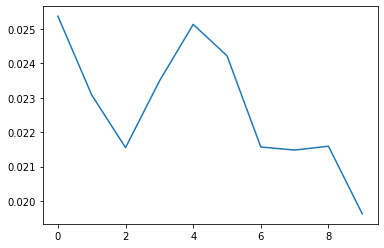

In [258]:
import matplotlib.pyplot as plt

mean_losses = list(map(lambda x: np.mean(x).flatten(), nn.stat['losses']))
plt.plot(range(10), mean_losses)

In [249]:
print(y_train[777])
a = nn.predict(X_train_[777])
np.argmax(a)

0


8

In [250]:
X_test_ = scaler.transform(X_test)
X_test_ = transform_input_data(X_test_)

y_hats = []
for x_i in X_test_:
    y_hat = nn.predict(x_i)
    y_hats.append(np.argmax(y_hat))

In [251]:
cm = confusion_matrix(y_test, y_hats)

<AxesSubplot:>

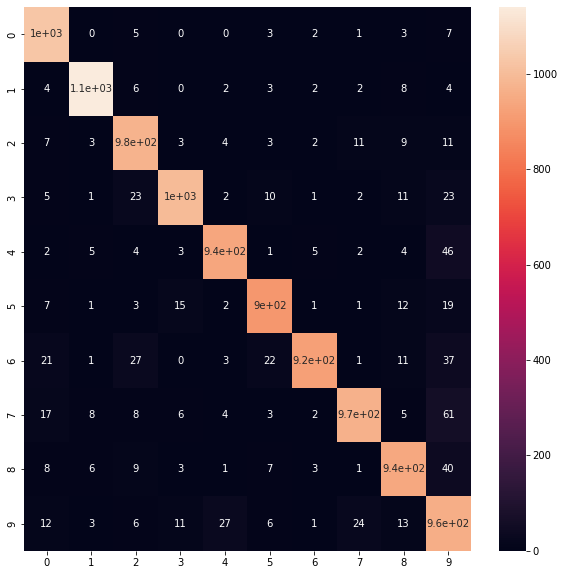

In [265]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [253]:
acc = accuracy_score(y_test, y_hats)
acc

0.9300952380952381

In [1]:
len('Optimizer: GradientDescent')

26

In [12]:
import requests
import os 
import tempfile
from pathlib import Path

In [7]:
def download_url(url: str, save_path: str, chunck_size=128) -> None:
        
        try:
            file = requests.get(url, stream=True)
            
            if file.status_code != 200:
                raise FileExistsError('Could not download file, check link')
        
            with open(save_path, 'wb') as f:
                for chunk in file.iter_content(chunk_size=1024):
                    if chunk:
                        f.write(chunk)
                        f.flush()
                    
        except Exception as ex:
            raise ex

In [13]:
mnist_data_url = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
mnist_labels_url = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"

save_data_path = 'datasets/mnist_data.gz'
save_label_path = 'datasets/mnist_labels.gz'

In [14]:
download_url(mnist_data_url, save_data_path)
download_url(mnist_labels_url, save_label_path)

In [19]:
with tempfile.TemporaryDirectory() as tempdir_name:
    temp_path = Path(tempdir_name)
    saving_filename = temp_path / 'mnist.gz'
    download_url(mnist_data_url, saving_filename)
    

C:\Users\kuweg\AppData\Local\Temp\tmpelksx4fw True
C:\Users\kuweg\AppData\Local\Temp\tmpelksx4fw\mnist.gz
True


In [33]:
import gzip
import numpy as np
import csv


def unpzip_mnist_images(file_path: str, save_path: str):
    with gzip.open(file_path, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
            
        return images


def unzip_mnist_labels(file_path: str):
    with gzip.open(file_path, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [37]:
test = training_images('datasets/mnist_data.gz')

In [86]:
from typing import Tuple


def write_to_scv(save_path: str, data: Tuple[np.ndarray]) -> None:
    header = ['target'] + ['pixel{}'.format(order) for order in range(784)]
    with open(save_path, 'w') as fh:
        writer = csv.writer(fh)
        
        writer.writerow(header)
        
        for sample, label in zip(*data):
            row = np.insert(sample.flatten(), 0, label)
            writer.writerow(row)


In [87]:
labels = training_labels('datasets/mnist_labels.gz')
write_to_scv('mnist.csv', (test, labels))

In [84]:
a = test[0].flatten()
b = labels[0]
c = np.insert(a, 0, b)
c.shape

(785,)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [88]:
import pandas as pd


In [95]:
df = pd.read_csv('mnist.csv')
df

,target,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df

,target,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import matplotlib.pyplot as plt

images = df.drop('target', axis=1).values
index = 1
image = images[1].reshape(28, 28)
plt.imshow(image)

NameError: name 'df' is not defined

In [2]:
from datasets.mnist import MNIST
import matplotlib.pyplot as plt

from nn.model import Sequential
from nn.activations import relu, tanh, sigmoid
from nn.layers import Dense
from nn.loss import MeanSquaredError
from nn.optimizer import GradientDescent

from nn.preprocessing import categorical_encoding, transform_input_data

from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
data = MNIST(mode='full')

All required files are exist!


In [4]:

train_data, test_data = data.dataset
X_train, y_train = train_data
X_test, y_test = test_data

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (60000, 784) (60000,)
Test: (10000, 784) (10000,)


In [5]:
def plot_image(x, y):
    image = x.reshape(28, 28)
    print(y)
    plt.imshow(image)    

In [6]:
def batch(x, y, batch_size):
    x = np.squeeze(x)
    y = np.squeeze(y)
    print('x:', x.shape)
    print('y:', y.shape)
    b = batch_size
    x0, x1 = x.shape
    new_x0, new_x1 = int(x0 / b), x1
    x_batch = x.reshape(new_x0, b, new_x1)
    print('x_b:', x_batch.shape)
    
    y0, y1 = y.shape[0], y.shape[1]
    new_y0 = int(y0 / b)
    y_batch = y.reshape(new_y0, b, y1)
    print('y_b:', y_batch.shape)
    return x_batch, np.squeeze(y_batch)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

X_test_ = transform_input_data(X_test_)
X_train_ = transform_input_data(X_train)

y_train_ = categorical_encoding(y_train)
y_train_ = transform_input_data(y_train_)

In [8]:
batch_size = 10
X_train_b, y_train_b= batch(X_train_, y_train_, batch_size)

x: (60000, 784)
y: (60000, 10)
x_b: (6000, 10, 784)
y_b: (6000, 10, 10)


In [9]:
X_train_b[0].shape

(10, 784)

In [10]:
nn = Sequential(input_shape=(batch_size, 784),
                layers=[
                    Dense(784, activation=relu),
                    Dense(10, activation=tanh)],
                optimizer=GradientDescent(0.1),
                loss=MeanSquaredError())

nn.info()

model: Sequential
------------------------------
Dense | (784,784) | relu
Dense | (10,784) | tanh
Optimizer: GradientDescent
loss: mean_squared_error


In [11]:
y_train_[0].shape

(10, 1)

In [12]:
x = transform_input_data(X_train_b)

In [13]:
X_train_b[0].shape

(10, 784)

In [14]:
X_train_b[0].reshape(-1, batch_size).shape

(784, 10)

In [15]:
from nn.dataloader import DataLoader

In [27]:
dl = DataLoader(X_train_, y_train)
# dl.batch(batch_size)

c:\Users\kuweg\VSCode\purenn\nn\dataloader.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(


In [29]:
dl.batch(batch_size)

(60000, 2)


In [33]:
for i, j in dl.data[0]:
    print(i.shape)
    print(j.shape) 
    break

(784, 1)
()


In [29]:
a = nn.forward(X_train_b[0].reshape(-1, batch_size))

In [30]:
nn.weights.wl1.input.shape

(784, 10)

In [31]:
X_train_b[0].reshape(-1, batch_size)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00441808, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00905385,
        -0.01600544, -0.02211976],
       [-0.026846  , -0.03184506, -0.04374841, ..., -0.056295  ,
        -0.05136654, -0.04263228],
       [-0.03317103, -0.02246288, -0.01606909, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
X_train_b = np.array(
    list(
        map(
            lambda x_i: x_i.reshape(-1, batch_size), X_train_b
        )
    )
)

In [26]:
X_train_b.shape

(6000, 10, 784)

In [34]:
print(y_train_.shape)
print(y_train_b.shape)

print(y_train_[0].shape)
print(y_train_b[0].shape)

(60000, 10, 1)
(6000, 10, 10)
(10, 1)
(10, 10)


In [36]:
nn.fit(X_train_b, y_train_b, batch_size = batch_size, epochs = 2)

<class 'numpy.ndarray'> and <class 'numpy.ndarray'> types as input data
Start training for 2 epochs


Epoch 1: 100%|██████████| 6000/6000 [01:02<00:00, 95.41samples/s]


mean_squared_error: 0.009244004328321901


Epoch 2: 100%|██████████| 6000/6000 [01:02<00:00, 96.21samples/s]

mean_squared_error: 0.009135579419096583


In [1]:
from nn.dataloader import DataLoader
from datasets.mnist import MNIST
import matplotlib.pyplot as plt


import numpy as np

In [2]:
data = MNIST(mode='full')

All required files are exist!


In [3]:

train_data, test_data = data.dataset
X_train, y_train = train_data
X_test, y_test = test_data

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (60000, 784) (60000,)
Test: (10000, 784) (10000,)


In [4]:
dl = DataLoader(X_train, y_train)

c:\Users\kuweg\VSCode\purenn\nn\dataloader.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(


In [5]:
dl.batch(13)

(60000, 2)
Need to upsample: 8


In [6]:
dl.data.shape

(4616, 13, 2)

In [49]:
bs = 13
nb = 60000 // bs
4616 * bs

60008

In [76]:
def make_pairs(x, y):
    return np.array(
        [(x_i, y_i) for x_i, y_i in zip(x,y)]
    )

In [77]:
b = make_pairs(X_train, y_train)

C:\Users\kuweg\AppData\Local\Temp\ipykernel_30352\778129172.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(


In [78]:
dl.data[0].shape

(2,)

In [79]:
c = np.vstack((dl.data, b[0]))
c.shape

(60001, 2)

In [81]:
cc = np.empty([1, 2])
print(cc)
c = np.vstack((cc, dl.data))
c.shape

[[1.30396821e-311 1.30396821e-311]]


(60001, 2)

In [82]:
for i in c[0]:
    if np.isnan(i):
        print(i)

In [83]:
c[0]

array([1.3039682074017e-311, 1.3039682118443e-311], dtype=object)

In [27]:
np.array(X_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
for i, j in b:
    print(i, j)
    break

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [1]:
from nn.dataloader import _pick_from_random_array

(2,)

In [26]:
def _pick_from_random_array(array: np.ndarray):
    donor_index = np.random.choice(range(array.shape[0]))
    donor = array[donor_index]
    print(donor)
    return 

In [27]:
c = _pick_from_random_array(b)

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [73]:
a1 = b[0]
a2 = b[1]
a3 = np.empty_like(a1)
a3 = np.vstack((a3, a1))
a3 = np.vstack((a3,a2))
a3 = a3[1:]

In [77]:
np.vstack((a1,a2))

array([[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                 0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
               126, 136, 175,  26, 166, 

In [39]:
b[0:2].shape

(2, 2)

In [76]:
a3[1]

array([array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
              159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
              252, 252, 252, 237,   0,   0,   0,   0

In [7]:
def foo(x, y):
    print(args, x, y)

In [10]:
foo(1, 2, 3, y=4 , x=5)

(1, 2, 3) 5 4


In [15]:
type(dl.data[0])

numpy.ndarray